In [ ]:
#RNN_LSTM_Project On Google Stock Prices Trend for Data ranging from 1-01-2005 to 31-12-2020
#Model Predicting the trend of Stock Price for January 2021

In [ ]:
#Part1- Data Prerecessing-

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset_train=pd.read_csv('GOOG_Stock_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
X_train=list()
y_train=list()
for i in range (60 ,4027):
    X_train.append(training_set_scaled[ i-60 :i ,0])
    y_train.append(training_set_scaled[ i,0])
X_train ,y_train =np.array(X_train) ,np.array(y_train)

In [ ]:
X_train=np.reshape(X_train ,(X_train.shape[0], X_train.shape[1] , 1))

In [ ]:
#Part2 -Building THE LSTM MODEL with 6 LSTM layers

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor= Sequential()

regressor.add(LSTM(units=70,return_sequences=True , input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=70,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=70,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=70,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=70,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=70,return_sequences=False))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam' ,loss='mean_squared_error')
regressor.fit(X_train,y_train, batch_size=32 ,epochs=100)

Epoch 1/100
124/124 [==============================] - 36s 211ms/step - loss: 0.0180
Epoch 2/100
124/124 [==============================] - 26s 210ms/step - loss: 0.0020
Epoch 3/100
124/124 [==============================] - 27s 219ms/step - loss: 0.0020
Epoch 4/100
124/124 [==============================] - 28s 227ms/step - loss: 0.0016
Epoch 5/100
124/124 [==============================] - 29s 236ms/step - loss: 0.0013
Epoch 6/100
124/124 [==============================] - 27s 216ms/step - loss: 0.0014
Epoch 7/100
124/124 [==============================] - 26s 213ms/step - loss: 0.0014
Epoch 8/100
124/124 [==============================] - 29s 231ms/step - loss: 0.0013
Epoch 9/100
124/124 [==============================] - 28s 229ms/step - loss: 0.0012
Epoch 10/100
124/124 [==============================] - 29s 230ms/step - loss: 0.0010
Epoch 11/100
124/124 [==============================] - 27s 219ms/step - loss: 9.9502e-04
Epoch 12/100
124/124 [==============================] - 28s

In [ ]:
#Part3- Making The Actual Real Prediction for 2021 January

In [ ]:
dataset_test=pd.read_csv('GOOG _Stock_Test.csv')
Actual_stock_Price= dataset_test.iloc[:,1:2].values

In [ ]:
dataset_total= pd.concat((dataset_train['Open'] ,dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total) -len(dataset_test) -60 :].values
inputs=inputs.reshape(-1 ,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range (60,79):
    X_test.append(inputs[i-60:i ,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test ,(X_test.shape[0] ,X_test.shape[1], 1))
predicted_stock=sc.inverse_transform(regressor.predict(X_test))

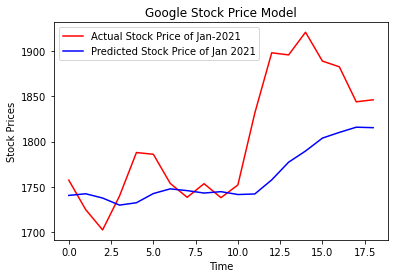

In [ ]:
#Visualizing The Results

plt.plot(Actual_stock_Price, color='red' ,label='Actual Stock Price of Jan-2021')
plt.plot(predicted_stock,color='blue' , label= 'Predicted Stock Price of Jan 2021')
plt.title('Google Stock Price Model')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [ ]:
#Stock prices are random in nature.Based on previous datasets it is difficult to predict the stock price of next day as these events depend
#on no.of factors & are absolutely random with no correlation with previous prices,so we can at best predict the trend of the stock price (upward /Downward Trend) that I tried to predict here.